# White Swan Data - Weather Visualization

## Import Required Packages

In [1]:
# import require packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import coolwarm, Spectral, binary
import cartopy.crs as ccrs

## Pandas Settings

In [2]:
# dataframe display settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.options.mode.chained_assignment = None

## Read JSON File to Dataframe

In [3]:
# read 'weather.json' file into dataframe
weather_json_df = pd.read_json('weather.json', lines=True)

# display first 5 rows of weather_json_df
display(weather_json_df.head())

,city,time,main,wind,clouds,weather
0,"{'id': 14256, 'name': 'Azadshahr', 'findname': 'AZADSHAHR', 'country': 'IR', 'coord': {'lon': 48.570728, 'lat': 34.790878}, 'zoom': 10}",1554462304,"{'temp': 287.07, 'pressure': 1022, 'humidity': 71, 'temp_min': 284.15, 'temp_max': 289.15}","{'speed': 4.1, 'deg': 340}",{'all': 90},"[{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}]"
1,"{'id': 56166, 'name': 'Jilib', 'findname': 'JILIB', 'country': 'SO', 'coord': {'lon': 42.785351, 'lat': 0.48829000000000006}, 'zoom': 9}",1554462304,"{'temp': 309.929, 'pressure': 1008.39, 'humidity': 36, 'temp_min': 309.929, 'temp_max': 309.929}","{'speed': 5.72, 'deg': 104}",{'all': 0},"[{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}]"
2,"{'id': 55671, 'name': 'Kismaayo', 'findname': 'KISMAAYO', 'country': 'SO', 'coord': {'lon': 42.545361, 'lat': -0.35817000000000004}, 'zoom': 6}",1554462304,"{'temp': 301.329, 'pressure': 1009.87, 'humidity': 100, 'temp_min': 301.329, 'temp_max': 301.329}","{'speed': 6.12, 'deg': 103.5}",{'all': 0},"[{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}]"
3,"{'id': 60019, 'name': 'Eyl', 'findname': 'EYL', 'country': 'SO', 'coord': {'lon': 49.816399, 'lat': 7.9803}, 'zoom': 5}",1554462304,"{'temp': 302.229, 'pressure': 1010.67, 'humidity': 80, 'temp_min': 302.229, 'temp_max': 302.229}","{'speed': 5.02, 'deg': 111.5}",{'all': 0},"[{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}]"
4,"{'id': 23814, 'name': 'Kahriz', 'findname': 'KAHRIZ', 'country': 'IR', 'coord': {'lon': 47.055302, 'lat': 34.383801}, 'zoom': 7}",1554462304,"{'temp': 285.62, 'pressure': 1021, 'humidity': 66, 'temp_min': 285.15, 'temp_max': 286.15}","{'speed': 2.1, 'deg': 150}",{'all': 75},"[{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}]"


## Unpack JSON Strings to DataFrame

In [4]:
# retrieve information stored in weather_json_df and store in weather_df
weather_list = []
for idx, row in weather_json_df.iterrows():
    col_1 = row['city']['id']
    col_2 = row['city']['name']
    col_3 = row['city']['country']
    col_4 = row['city']['coord']['lon']
    col_5 = row['city']['coord']['lat']
    col_6 = row['city']['zoom']
    col_7 = row['time']
    col_8 = row['main']['temp']
    col_9 = row['main']['pressure']
    col_10 = row['main']['humidity']
    col_11 = row['main']['temp_min']
    col_12 = row['main']['temp_max']
    col_13 = row['wind']['speed']
    col_14 = row['wind']['deg']
    col_15 = row['clouds']['all']
    col_16 = row['weather'][0]['id']
    col_17 = row['weather'][0]['main']
    col_18 = row['weather'][0]['description']
    col_19 = row['weather'][0]['icon']
    weather_list.append([col_1, col_2, col_3, col_4, col_5,
                         col_6, col_7, col_8, col_9, col_10,
                         col_11, col_12, col_13, col_14, col_15,
                         col_16, col_17, col_18, col_19])

# create new dataframe to store relevant elements of json strings as columns
weather_df = pd.DataFrame(weather_list, columns=['City_ID', 'City_Name', 'City_Country', 'City_Longitude', 'City_Latitude',
                                                 'City_Zoom', 'Time', 'Main_Temp', 'Main_Pressure', 'Main_Humidity',
                                                 'Main_Temp_Min', 'Main_Temp_Max', 'Wind_Speed', 'Wind_Deg', 'Clouds_All',
                                                 'Weather_ID', 'Weather_Main', 'Weather_Description', 'Weather_Icon'])

In [5]:
# display first 5 rows of weather_df
display(weather_df.head())

,City_ID,City_Name,City_Country,City_Longitude,City_Latitude,City_Zoom,Time,Main_Temp,Main_Pressure,Main_Humidity,Main_Temp_Min,Main_Temp_Max,Wind_Speed,Wind_Deg,Clouds_All,Weather_ID,Weather_Main,Weather_Description,Weather_Icon
0,14256,Azadshahr,IR,48.570728,34.790878,10,1554462304,287.070,1022.00,71,284.150,289.150,4.10,340.0,90,804,Clouds,overcast clouds,04d
1,56166,Jilib,SO,42.785351,0.488290,9,1554462304,309.929,1008.39,36,309.929,309.929,5.72,104.0,0,800,Clear,clear sky,01d
2,55671,Kismaayo,SO,42.545361,-0.358170,6,1554462304,301.329,1009.87,100,301.329,301.329,6.12,103.5,0,800,Clear,clear sky,01d
3,60019,Eyl,SO,49.816399,7.980300,5,1554462304,302.229,1010.67,80,302.229,302.229,5.02,111.5,0,800,Clear,clear sky,01d
4,23814,Kahriz,IR,47.055302,34.383801,7,1554462304,285.620,1021.00,66,285.150,286.150,2.10,150.0,75,803,Clouds,broken clouds,04d


## Check for Missing Values

In [6]:
# check for missing values in weather_df
weather_df.isnull().sum()

City_ID                0
City_Name              0
City_Country           0
City_Longitude         0
City_Latitude          0
City_Zoom              0
Time                   0
Main_Temp              0
Main_Pressure          0
Main_Humidity          0
Main_Temp_Min          0
Main_Temp_Max          0
Wind_Speed             0
Wind_Deg               0
Clouds_All             0
Weather_ID             0
Weather_Main           0
Weather_Description    0
Weather_Icon           0
dtype: int64

## Visualization

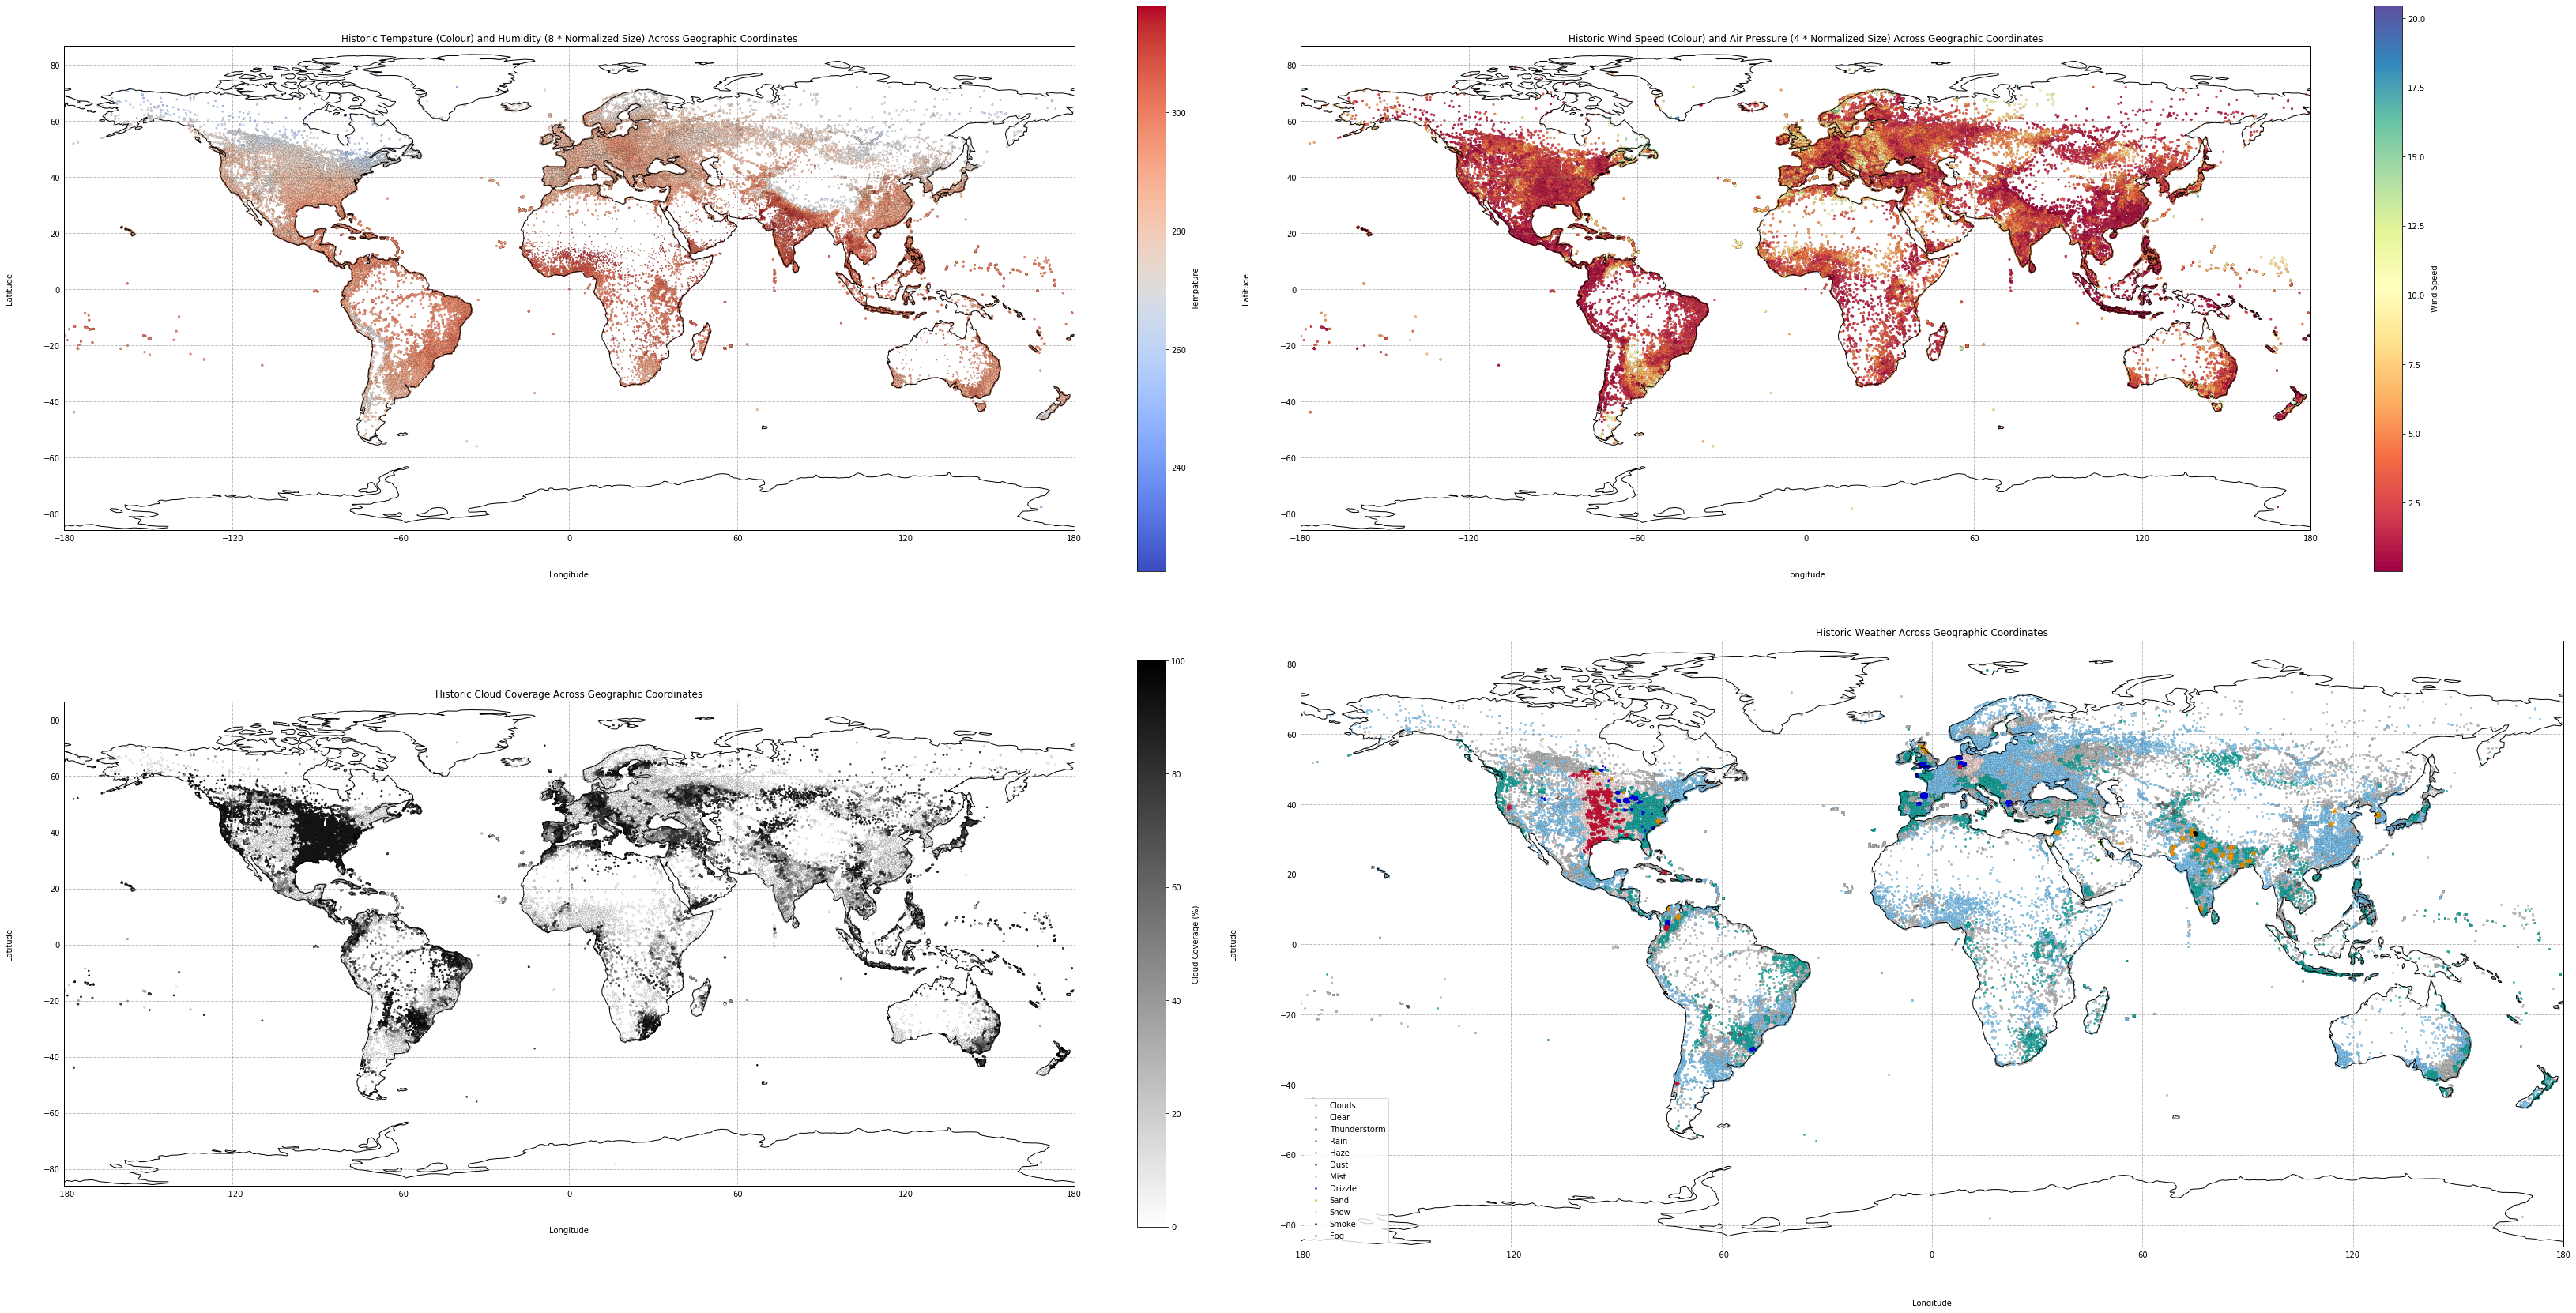

In [7]:
# visulaization

# define figure
fig = plt.figure(figsize=[45, 45])

# geospatial plot for 'City_Longitude', 'City_Latitude', 'Main_Temp' (as colour of points), and 'Main_Humidity' (as size of points)
ax1 = fig.add_subplot(221, projection=ccrs.PlateCarree())
# plot coastlines
ax1.coastlines()
# specify grid lines
grid_lines_ax1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
grid_lines_ax1.xlabels_top = False
grid_lines_ax1.ylabels_right = False
# plot attributes as scatter plot on top of map
img1 = ax1.scatter(weather_df['City_Longitude'], weather_df['City_Latitude'], c=weather_df['Main_Temp'], 
                   s=(8*weather_df['Main_Humidity']/(weather_df['Main_Humidity'].max()-weather_df['Main_Humidity'].min())), cmap=coolwarm, edgecolors='black', linewidth=0.1)
ax1.text(-0.05, 0.5, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax1.transAxes)
ax1.text(0.5, -0.1, 'Longitude', va='bottom', ha='center',
         rotation='horizontal', rotation_mode='anchor',
         transform=ax1.transAxes)
# add colour bar
img1_cb = plt.colorbar(img1, ax=ax1, shrink=0.3)
img1_cb.set_label('Tempature', labelpad=7.5)
ax1.title.set_text('Historic Tempature (Colour) and Humidity (8 * Normalized Size) Across Geographic Coordinates')

# geospatial plot for 'City_Longitude', 'City_Latitude', 'Wind_Speed' (as colour of points), and 'Main_Pressure' (as size of points)
ax2 = fig.add_subplot(222, projection=ccrs.PlateCarree())
# plot coastlines
ax2.coastlines()
# specify grid lines
grid_lines_ax2 = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
grid_lines_ax2.xlabels_top = False
grid_lines_ax2.ylabels_right = False
# plot attributes as scatter plot on top of map
img2 = ax2.scatter(weather_df['City_Longitude'], weather_df['City_Latitude'], c=weather_df['Wind_Speed'], 
                   s=(4*weather_df['Main_Pressure']/(weather_df['Main_Pressure'].max()-weather_df['Main_Pressure'].min())), cmap=Spectral, edgecolors='black', linewidth=0.1)
ax2.text(-0.05, 0.5, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax2.transAxes)
ax2.text(0.5, -0.1, 'Longitude', va='bottom', ha='center',
         rotation='horizontal', rotation_mode='anchor',
         transform=ax2.transAxes)
# add colour bar
img2_cb = plt.colorbar(img2, ax=ax2, shrink=0.3)
img2_cb.set_label('Wind Speed', labelpad=7.5)
ax2.title.set_text('Historic Wind Speed (Colour) and Air Pressure (4 * Normalized Size) Across Geographic Coordinates')

# geospatial plot for 'City_Longitude', 'City_Latitude', and 'Clouds_All' (as colour of points)
ax3 = fig.add_subplot(223, projection=ccrs.PlateCarree())
# plot coastlines
ax3.coastlines()
# specify grid lines
grid_lines_ax3 = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
grid_lines_ax3.xlabels_top = False
grid_lines_ax3.ylabels_right = False
# plot attributes as scatter plot on top of map
img3 = ax3.scatter(weather_df['City_Longitude'], weather_df['City_Latitude'], c=weather_df['Clouds_All'], s=6, cmap=binary, edgecolors='black', linewidth=0.1)
ax3.text(-0.05, 0.5, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax3.transAxes)
ax3.text(0.5, -0.1, 'Longitude', va='bottom', ha='center',
         rotation='horizontal', rotation_mode='anchor',
         transform=ax3.transAxes)
# add colour bar
img3_cb = plt.colorbar(img3, ax=ax3, shrink=0.3)
img3_cb.set_label('Cloud Coverage (%)', labelpad=7.5)
ax3.title.set_text('Historic Cloud Coverage Across Geographic Coordinates')

# geospatial plot for 'City_Longitude', 'City_Latitude', and 'Weather_Main' (as colour of points)
weather_colors = {'Clouds':'silver', 'Clear':'lightskyblue', 'Thunderstorm':'dimgray', 'Rain':'lightseagreen',
                  'Haze':'orange', 'Dust':'green', 'Mist':'mistyrose', 'Drizzle':'blue', 'Sand':'gold',
                  'Snow':'snow', 'Smoke':'black', 'Fog':'crimson'}
ax4 = fig.add_subplot(224, projection=ccrs.PlateCarree())
# plot coastlines
ax4.coastlines()
# specify grid lines
grid_lines_ax4 = ax4.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
grid_lines_ax4.xlabels_top = False
grid_lines_ax4.ylabels_right = False
# plot attributes as scatter plot on top of map
img_plots = []
for x in weather_df['Weather_Main'].unique():
    img4 = plt.scatter(weather_df.query('`Weather_Main`==@x')['City_Longitude'], weather_df.query('`Weather_Main`==@x')['City_Latitude'], s=6, c=weather_colors[x], edgecolors='black', linewidth=0.1)
    img_plots.append(img4)
ax4.text(-0.05, 0.5, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax4.transAxes)
ax4.text(0.5, -0.1, 'Longitude', va='bottom', ha='center',
         rotation='horizontal', rotation_mode='anchor',
         transform=ax4.transAxes)
# add legend
plt.legend(img_plots, ['Clouds', 'Clear', 'Thunderstorm', 'Rain', 'Haze', 'Dust', 'Mist',
                       'Drizzle', 'Sand', 'Snow', 'Smoke', 'Fog'], loc='lower left')
ax4.title.set_text('Historic Weather Across Geographic Coordinates')

fig.tight_layout(h_pad=-100)

# save visualization as png
plt.savefig('weather visualization.png')

plt.show()